In [230]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline
color_pallete = ["#1e3257", "#f29d52", "#dbe5e6", "#f3c660", "#be4f27", "#addae0"]

sns.set_palette(color_pallete)



In [77]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace=True)

In [78]:
data = data.set_index('EmployeeNumber')

In [79]:
data = pd.read_csv('/Users/kseniayakunina/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv', delimiter=",")
print(data.head(1))
data1_ = data.copy()

   Age Attrition BusinessTravel  DailyRate Department  DistanceFromHome  \
0   41       Yes  Travel_Rarely       1102      Sales                 1   

   Education EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2  Life Sciences              1               1  ...   

   RelationshipSatisfaction StandardHours  StockOptionLevel  \
0                         1            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  

[1 rows x 35 columns]


Feature : Age

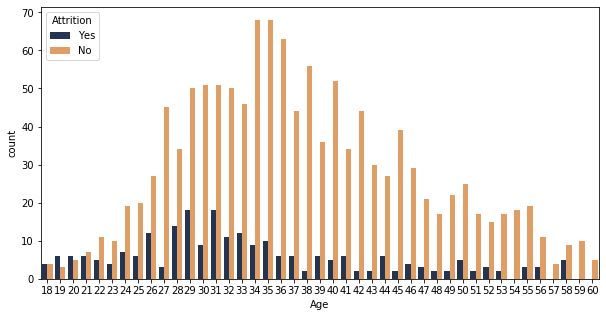

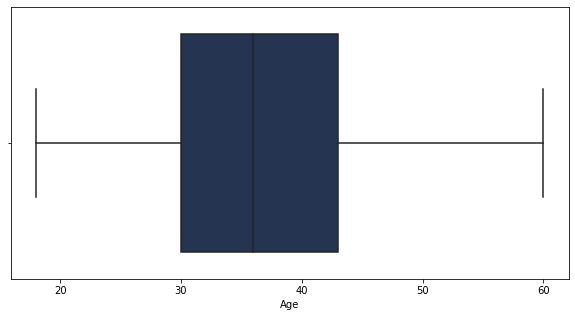

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Age', data = data, hue = 'Attrition' )
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot('Age', data = data)
plt.show()

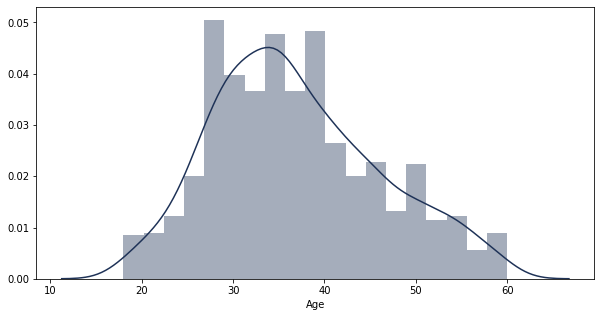

In [26]:
plt.figure(figsize=(10,5))
ax = sns.distplot(data['Age'])
plt.show()

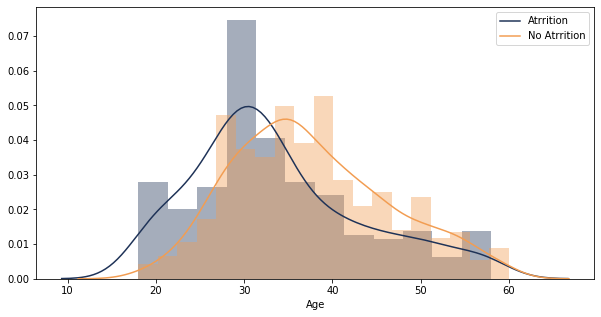

In [90]:
plt.figure(figsize=(10,5))
a = data[(data['Attrition'] == "Yes")]
n = data[(data['Attrition'] == "No")]
ax = sns.distplot(a['Age'], kde_kws = {"label": "Atrrition"})
f = sns.distplot(n['Age'], kde_kws = {"label": "No Atrrition"})
plt.show()

In [137]:
categ_columns = data.columns[data.dtypes == 'object']
nums = data.columns[data.dtypes == 'float64'].union(data.columns[data.dtypes == 'int64'])
print(nums)
#delete categorical int features for finding anomalies

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


<Figure size 1440x1440 with 0 Axes>

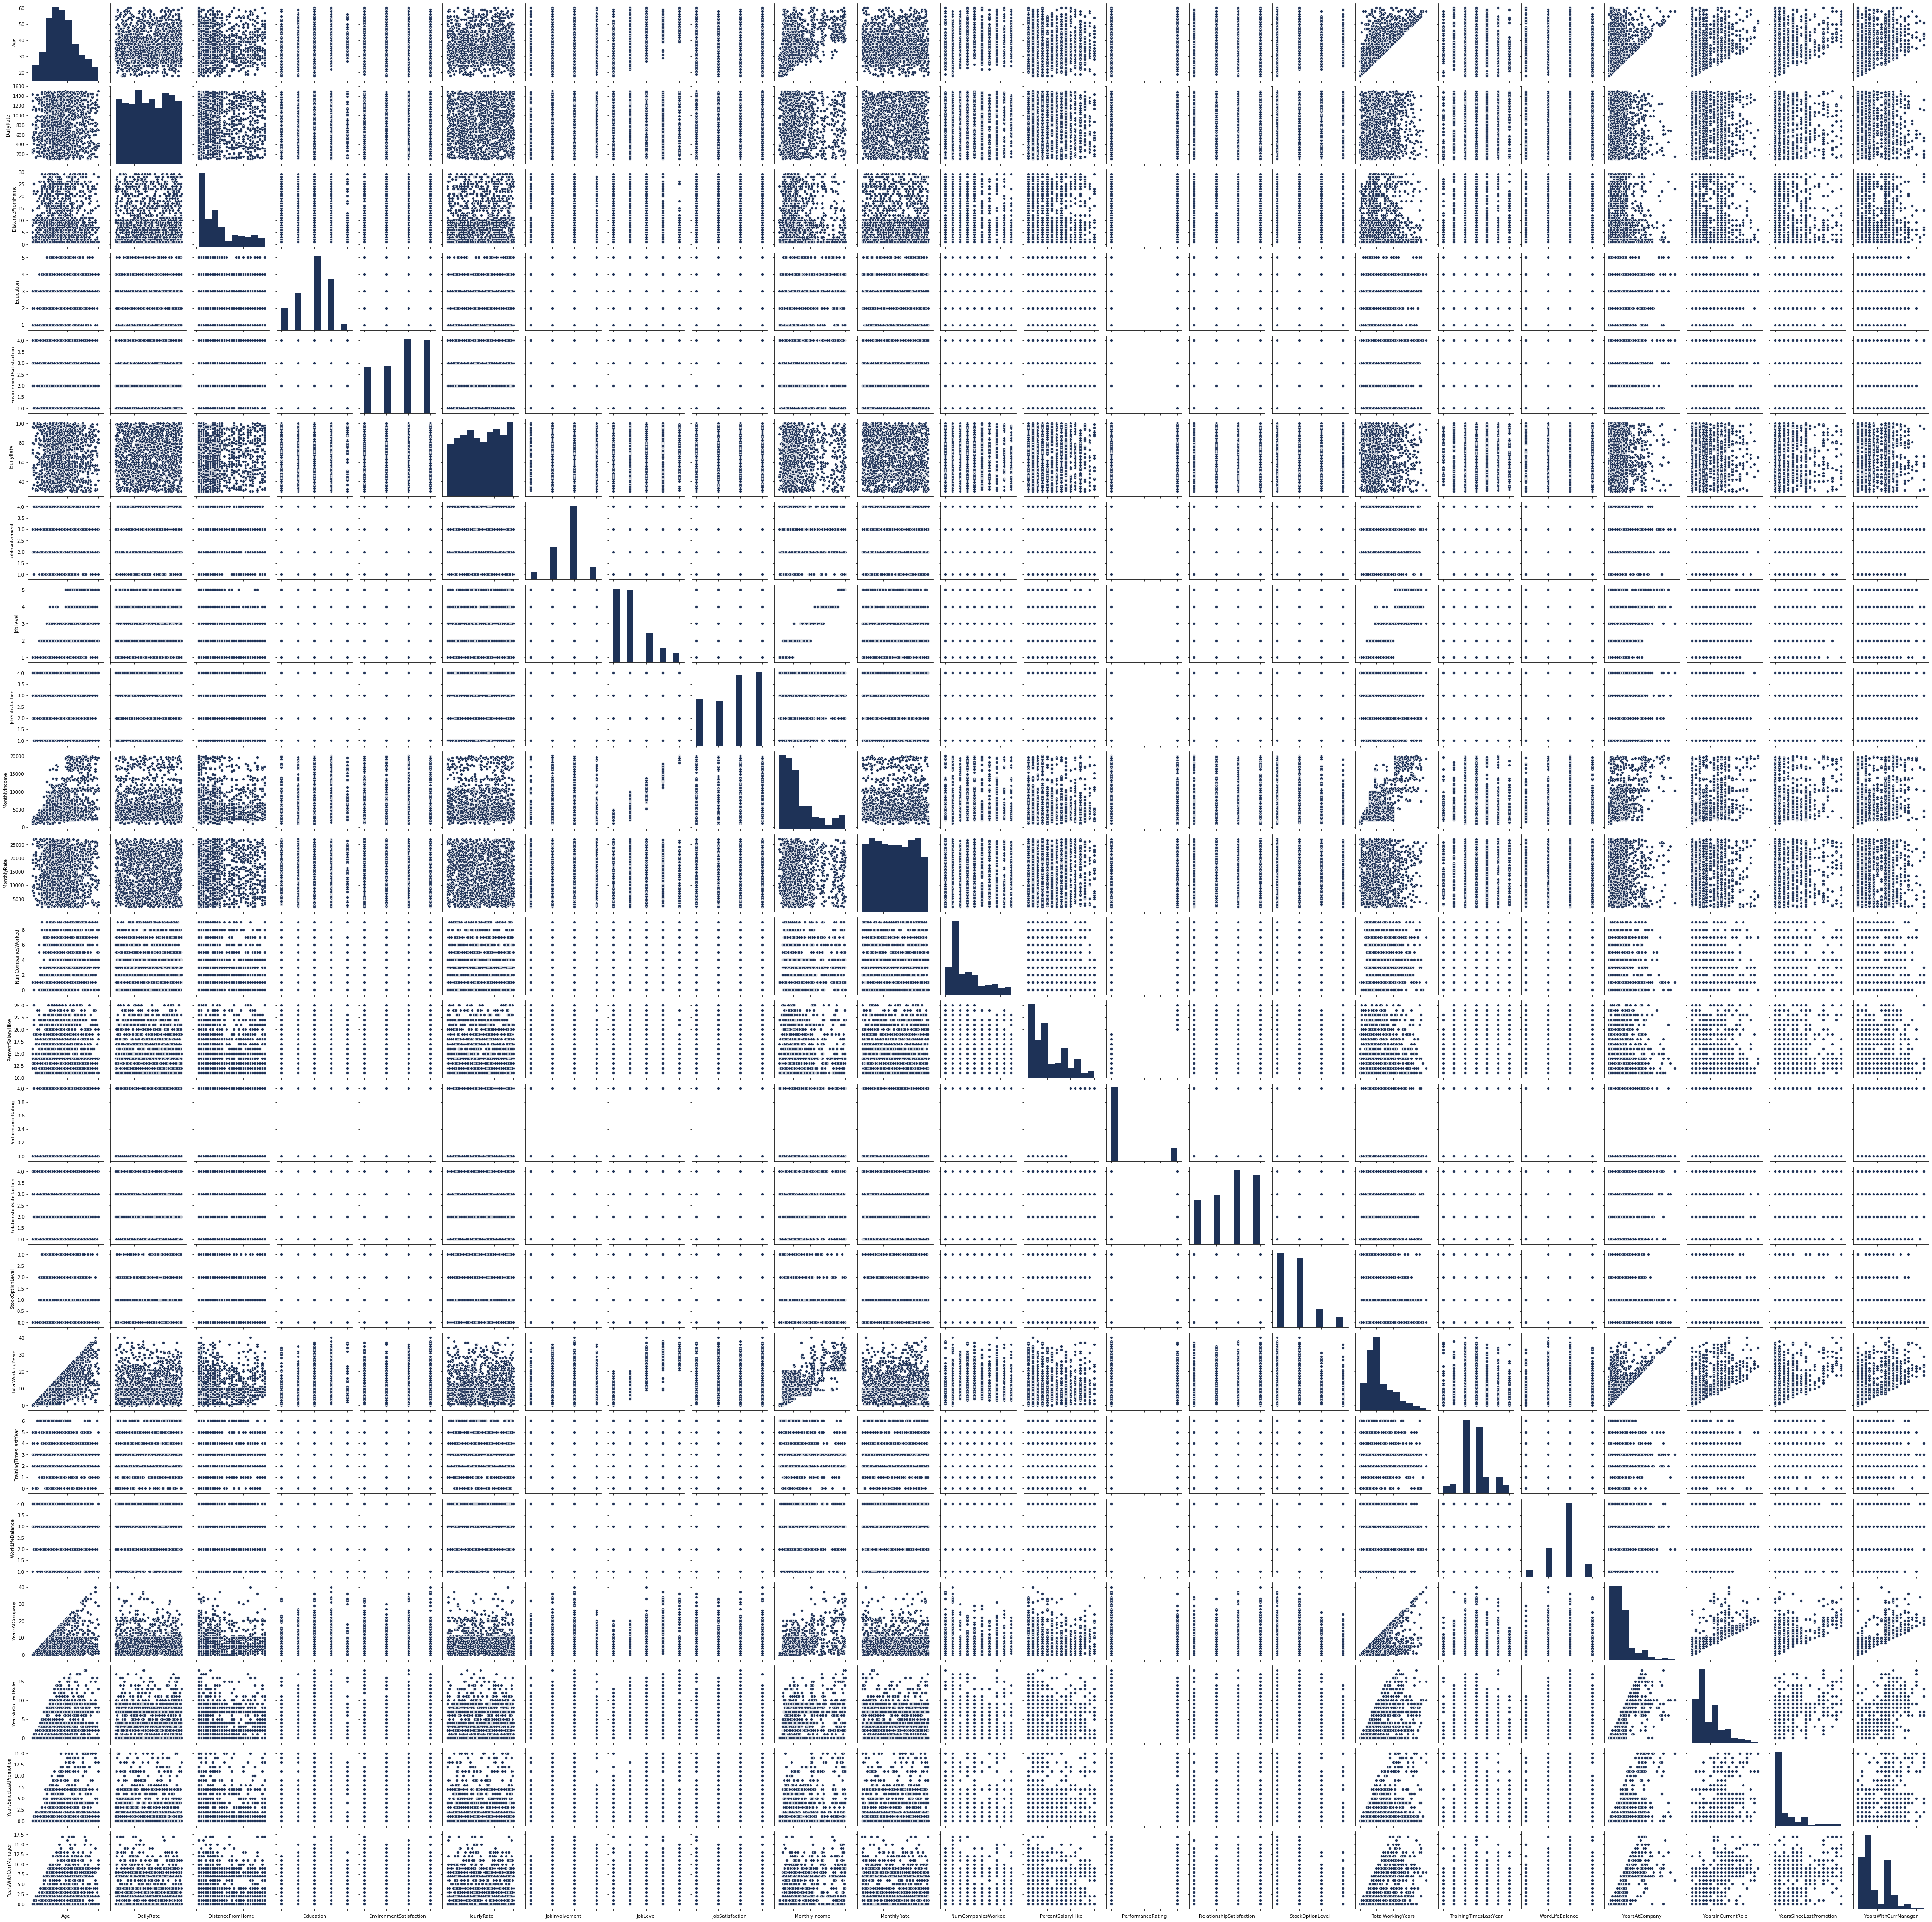

In [148]:
nums.drop()
plt.figure(figsize=(20,20))
g = sns.pairplot(data[nums])
g.set(xticklabels=[])
plt.show()

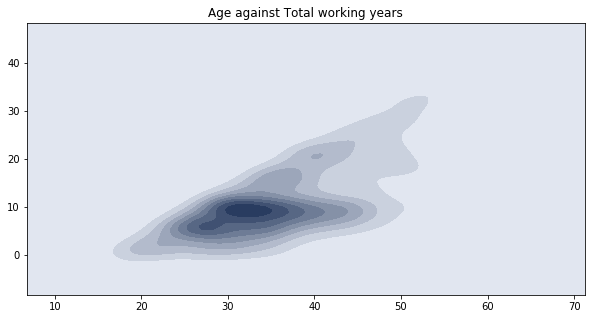

In [104]:
plt.figure(figsize=(10,5))
x = data['Age'].values
y = data['TotalWorkingYears'].values
ans = sns.kdeplot(x, y, shade=True, cut=5)
ans.set( title = 'Age against Total working years')
plt.show()

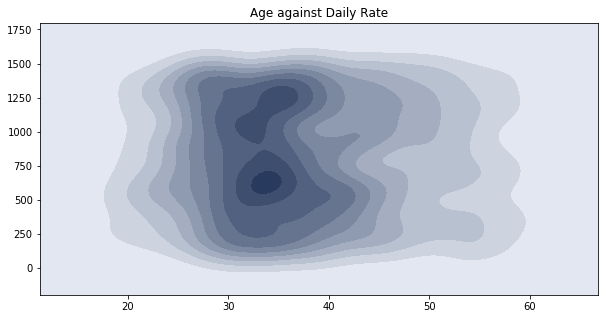

In [109]:
plt.figure(figsize=(10,5))
x = data['Age'].values
y = data['DailyRate'].values
ax = sns.kdeplot(x, y, shade=True)
ax.set( title = 'Age against Daily Rate')
plt.show()

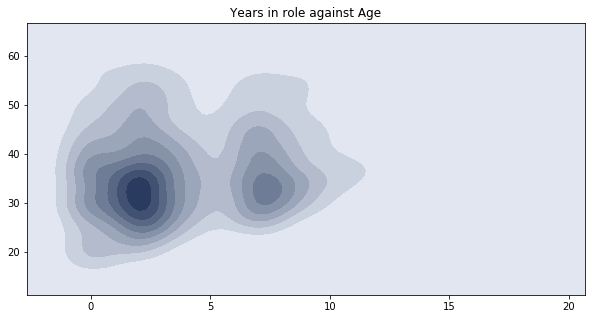

In [111]:
plt.figure(figsize=(10,5))
x = data['YearsInCurrentRole'].values
y = data['Age'].values
ax = sns.kdeplot(x, y, shade=True)
ax.set( title = 'Years in role against Age')
plt.show()

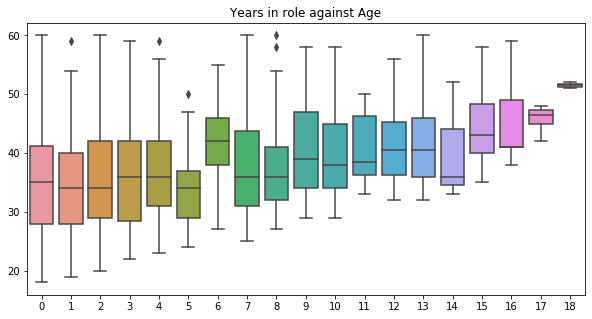

In [136]:
plt.figure(figsize=(10,5))
x = data['YearsInCurrentRole'].values
y = data['Age'].values
ax = sns.boxplot(x, y,)
ax.set_xlabel('Years In Current Role')
ax_set_ylabel('Age')
ax.set( title = 'Years in role against Age')
plt.show()

There are some outliners in this graph.

In [48]:
data['Age'].value_counts(normalize=True)

35    0.053061
34    0.052381
31    0.046939
36    0.046939
29    0.046259
32    0.041497
30    0.040816
33    0.039456
38    0.039456
40    0.038776
37    0.034014
27    0.032653
28    0.032653
42    0.031293
39    0.028571
45    0.027891
41    0.027211
26    0.026531
46    0.022449
44    0.022449
43    0.021769
50    0.020408
24    0.017687
25    0.017687
47    0.016327
49    0.016327
55    0.014966
48    0.012925
51    0.012925
53    0.012925
52    0.012245
54    0.012245
22    0.010884
56    0.009524
58    0.009524
23    0.009524
21    0.008844
20    0.007483
59    0.006803
19    0.006122
18    0.005442
60    0.003401
57    0.002721
Name: Age, dtype: float64

Feature : Business Travel

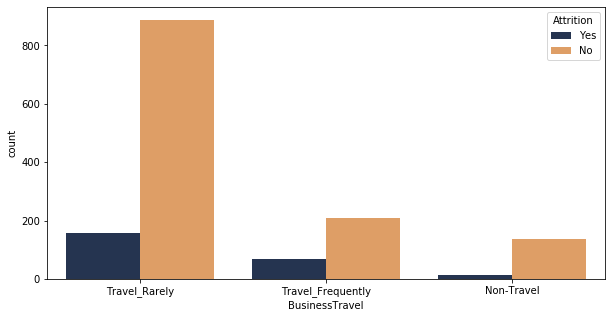

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'BusinessTravel', data = data, hue = 'Attrition' )
plt.show()

In [62]:
data['BusinessTravel'].value_counts(normalize=True)

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

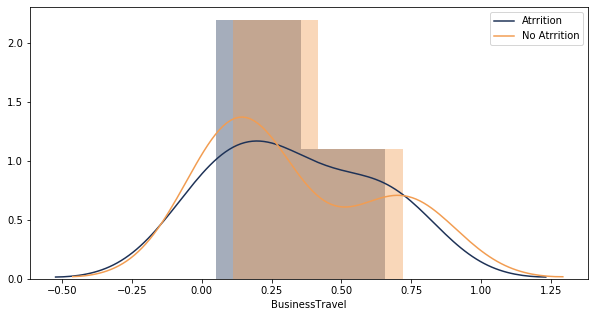

In [89]:
plt.figure(figsize=(10,5))
a = data[(data['Attrition'] == "Yes")]
n = data[(data['Attrition'] == "No")]
ax = sns.distplot(a['BusinessTravel'].value_counts(normalize=True), kde_kws = {"label": "Atrrition"})
f = sns.distplot(n['BusinessTravel'].value_counts(normalize=True), kde_kws = {"label": "No Atrrition"})
plt.show()

Feature : Department

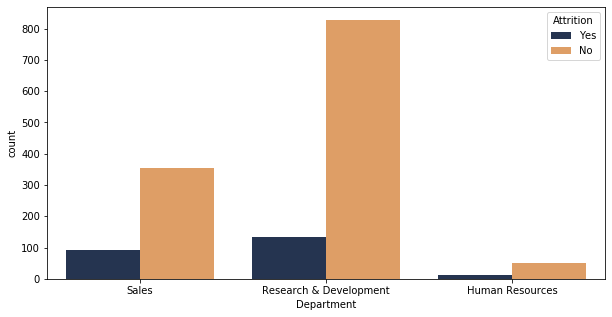

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Department', data = data, hue = 'Attrition')
plt.show()

In [115]:
data['Department'].value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

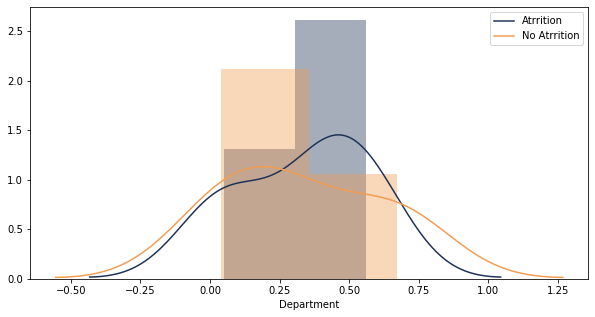

In [116]:
plt.figure(figsize=(10,5))
a = data[(data['Attrition'] == "Yes")]
n = data[(data['Attrition'] == "No")]
ax = sns.distplot(a['Department'].value_counts(normalize=True), kde_kws = {"label": "Atrrition"})
f = sns.distplot(n['Department'].value_counts(normalize=True), kde_kws = {"label": "No Atrrition"})
plt.show()

<Figure size 720x2880 with 0 Axes>

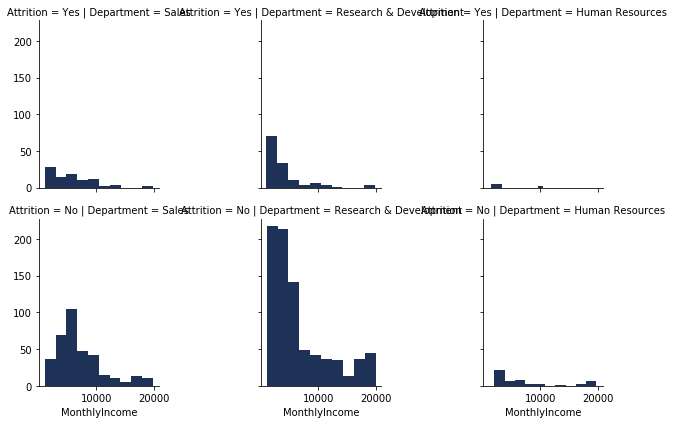

In [169]:
#department and moth income
plt.figure(figsize=(10,40))
g = sns.FacetGrid(data, col="Department", row="Attrition")
g = g.map(plt.hist, "MonthlyIncome")
plt.show()

Feature : Distance from Home

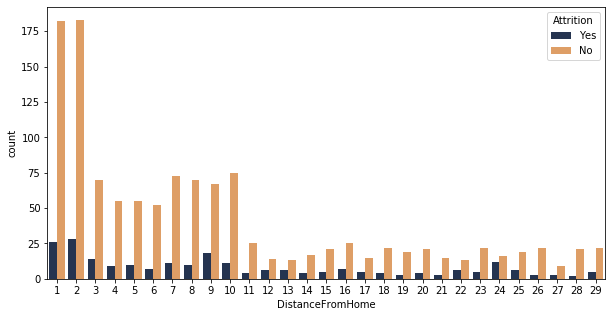

In [117]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'DistanceFromHome', data = data, hue = 'Attrition')
plt.show()

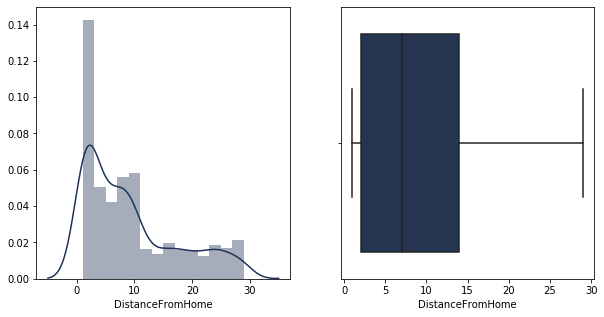

In [135]:
fig,ax=plt.subplots(1,2, figsize=(10,5))
sns.distplot(data['DistanceFromHome'], ax=ax[0])
sns.boxplot('DistanceFromHome', data = data)
plt.show()



It is mentionable that 75% of values are to the left of 15. Anomaly dosen't found.

In [ ]:
Feature : Education

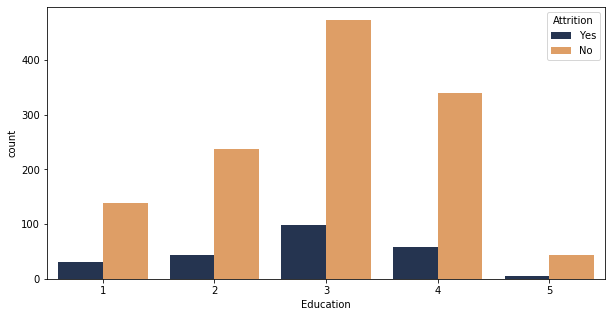

In [140]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Education', data = data, hue = 'Attrition' )
plt.show()

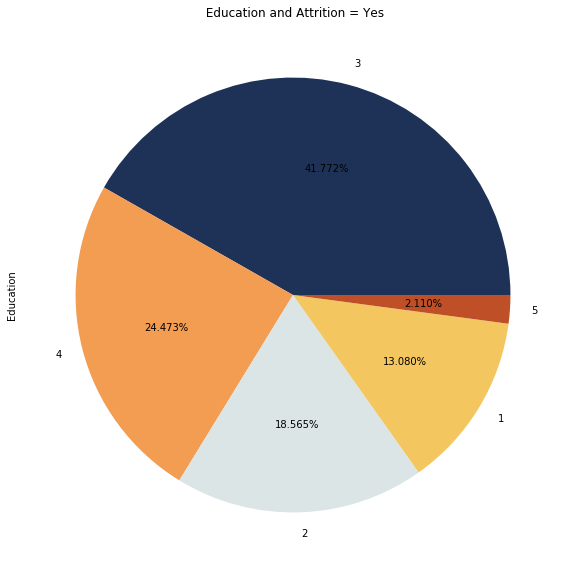

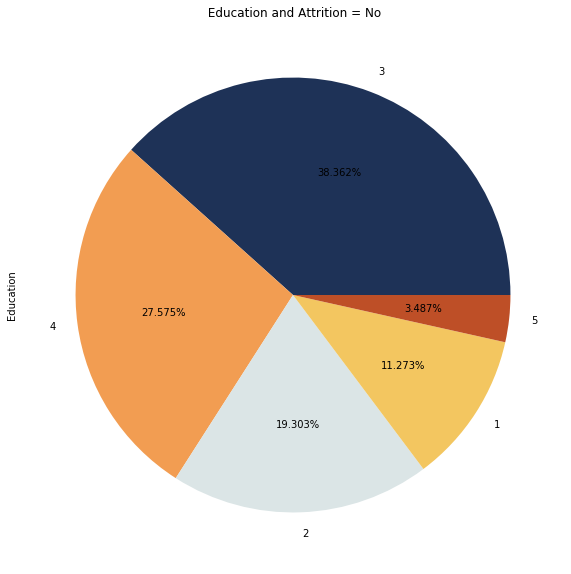

In [146]:
f,ax=plt.subplots(figsize=(15,10))
a = data[(data['Attrition'] == "Yes")]
n = data[(data['Attrition'] == "No")]
ax.set_title(" Education and Attrition = Yes")
a.Education.value_counts().plot.pie(autopct='%1.3f%%')
plt.show()
f,ax=plt.subplots(figsize=(15,10))
n.Education.value_counts().plot.pie(autopct='%1.3f%%')
ax.set_title(" Education and Attrition = No")
plt.show()

In [ ]:
Feature : Education Field

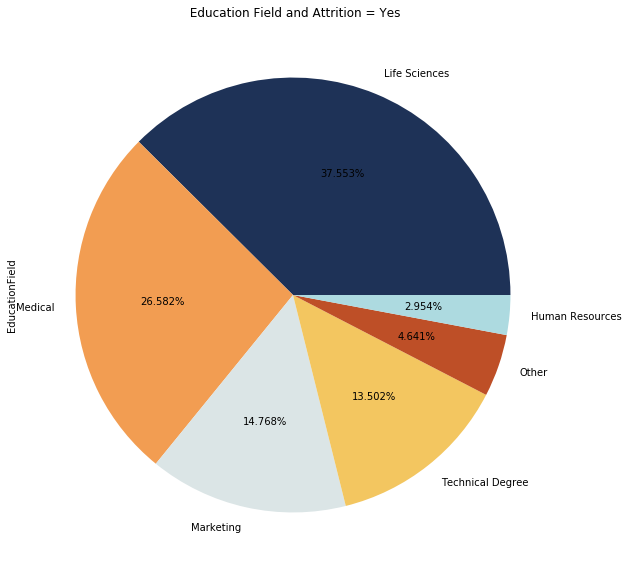

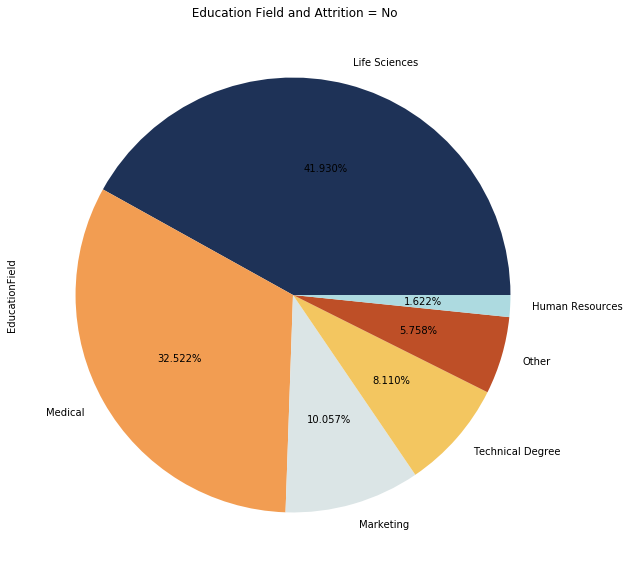

In [145]:
f,ax=plt.subplots(figsize=(15,10))
a = data[(data['Attrition'] == "Yes")]
n = data[(data['Attrition'] == "No")]
ax.set_title(" Education Field and Attrition = Yes")
a.EducationField.value_counts().plot.pie(autopct='%1.3f%%')
plt.show()
f,ax=plt.subplots(figsize=(15,10))
n.EducationField.value_counts().plot.pie(autopct='%1.3f%%')
ax.set_title(" Education Field and Attrition = No")
plt.show()

There is no such a big persentage difference in Education and Education field according to Atrrition values.

Feature : Environment  Satisfaction

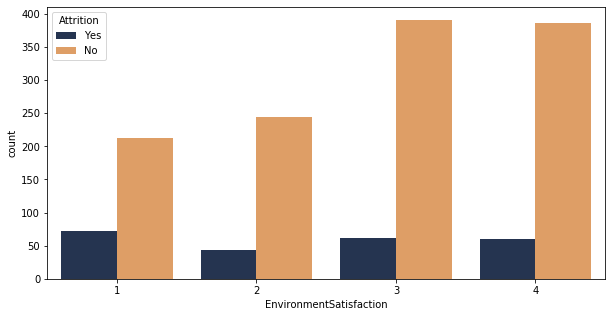

In [196]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EnvironmentSatisfaction', data = data, hue = 'Attrition' )
plt.show()

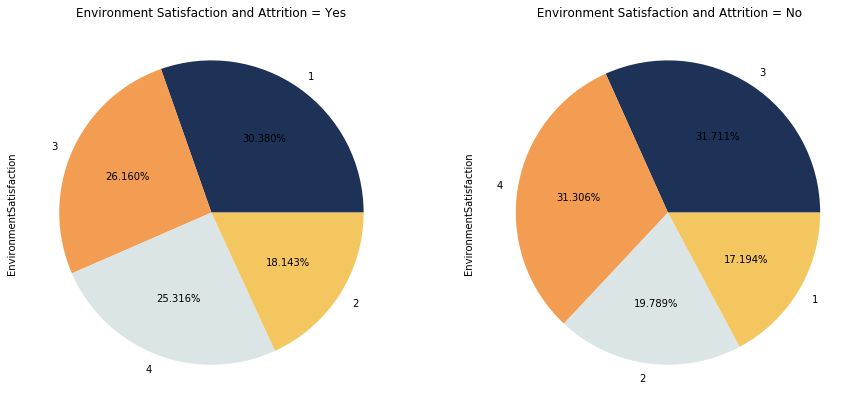

In [198]:
f,ax=plt.subplots(1,2, figsize=(15,10))
a = data[(data['Attrition'] == "Yes")]
n = data[(data['Attrition'] == "No")]
ax[0].set_title("Environment Satisfaction and Attrition = Yes")
a.EnvironmentSatisfaction.value_counts().plot.pie(autopct='%1.3f%%', ax = ax[0])
n.EnvironmentSatisfaction.value_counts().plot.pie(autopct='%1.3f%%', ax = ax[1])
ax[1].set_title(" Environment Satisfaction and Attrition = No")
plt.show()

In [200]:
data['EnvironmentSatisfaction'].value_counts(normalize=True)

3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: EnvironmentSatisfaction, dtype: float64

The level of satisfaction within the company shows that people who left the position frequent rated lower than those who continued to work.

[Text(0.5, 1.0, 'Relationship Satisfaction against years with manager')]

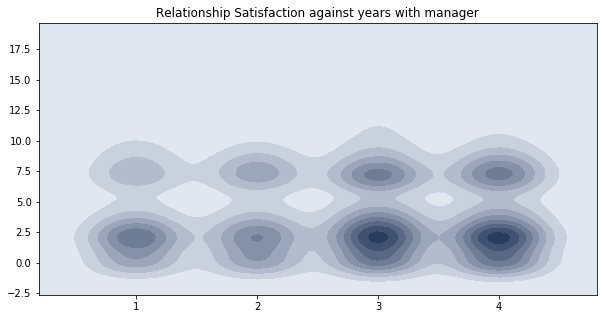

In [201]:
plt.figure(figsize=(10,5))
x = data['EnvironmentSatisfaction'].values
y = data['YearsWithCurrManager'].values
g = sns.kdeplot(x, y, shade=True)
g.set( title = 'Relationship Satisfaction against years with manager')

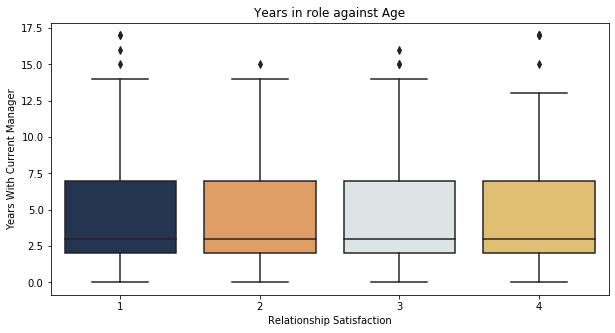

In [202]:
plt.figure(figsize=(10,5))
x = data['EnvironmentSatisfaction'].values
y = data['YearsWithCurrManager'].values
ax = sns.boxplot(x, y)
ax.set_xlabel('Relationship Satisfaction')
ax.set_ylabel('Years With Current Manager')
ax.set( title = 'Years in role against Age')
plt.show()

Feature : Gender

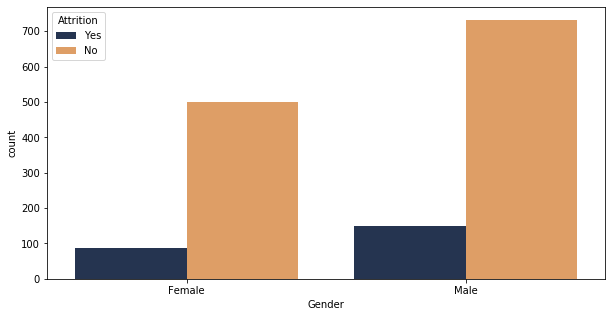

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender', data = data, hue = 'Attrition' )
plt.show()

In [194]:
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

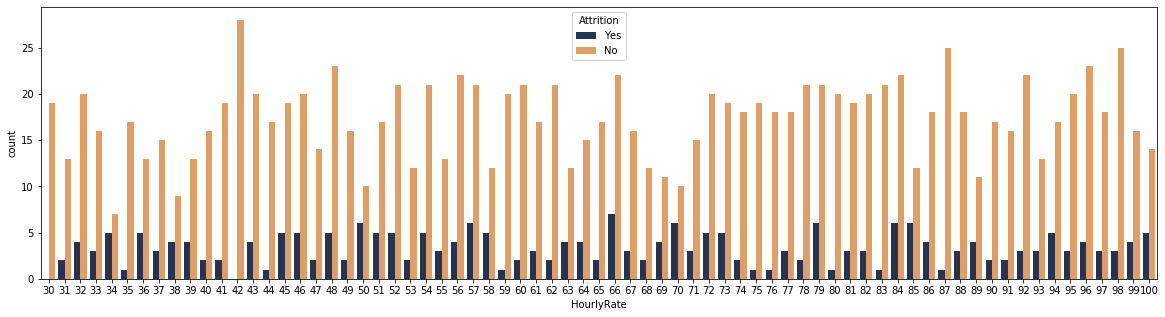

In [173]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'HourlyRate', data = data, hue = 'Attrition' )
plt.show()


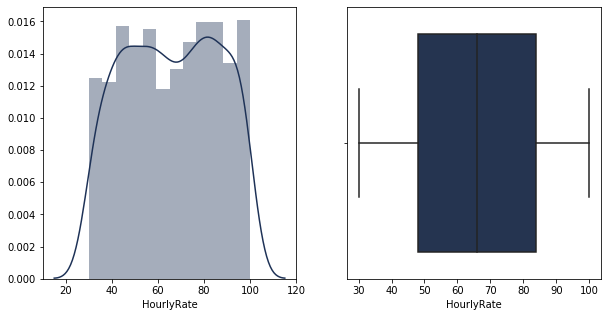

In [191]:
fig,ax=plt.subplots(1,2, figsize=(10,5))
sns.distplot(data['HourlyRate'], ax=ax[0])
sns.boxplot('HourlyRate', data = data)
plt.show()

[Text(0.5, 1.0, 'Job Satisfaction against hourly rate')]

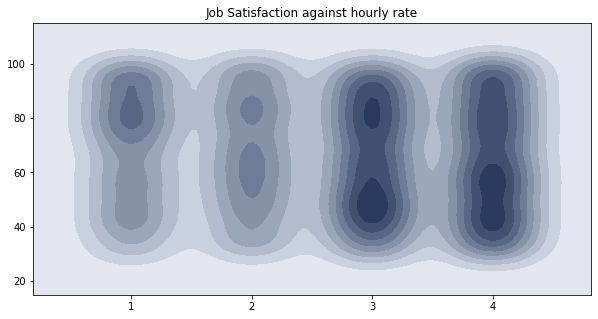

In [189]:
plt.figure(figsize=(10,5))
y = data['HourlyRate'].values
x = data['JobSatisfaction'].values
g = sns.kdeplot(x, y, shade=True)
g.set( title = 'Job Satisfaction against hourly rate')

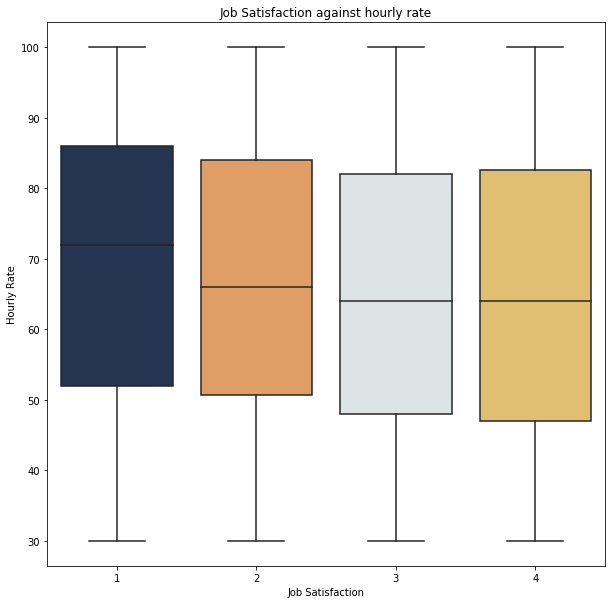

In [190]:
plt.figure(figsize=(10,10))
y = data['HourlyRate'].values
x = data['JobSatisfaction'].values
ax = sns.boxplot(x, y)
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Hourly Rate')
ax.set( title = 'Job Satisfaction against hourly rate')
plt.show()

Feature : Job Satisfaction

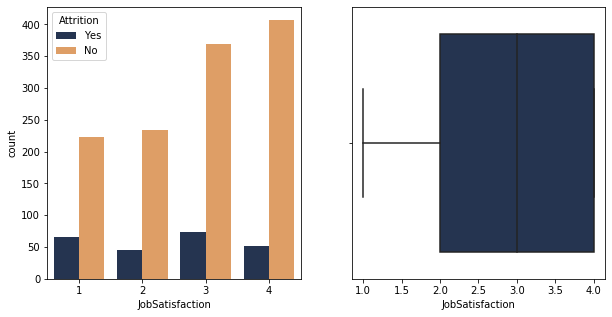

In [207]:
fig,ax=plt.subplots(1,2, figsize=(10,5))
sns.countplot(x = 'JobSatisfaction',data = data, hue = 'Attrition', ax=ax[0])
sns.boxplot('JobSatisfaction', data = data)
plt.show()

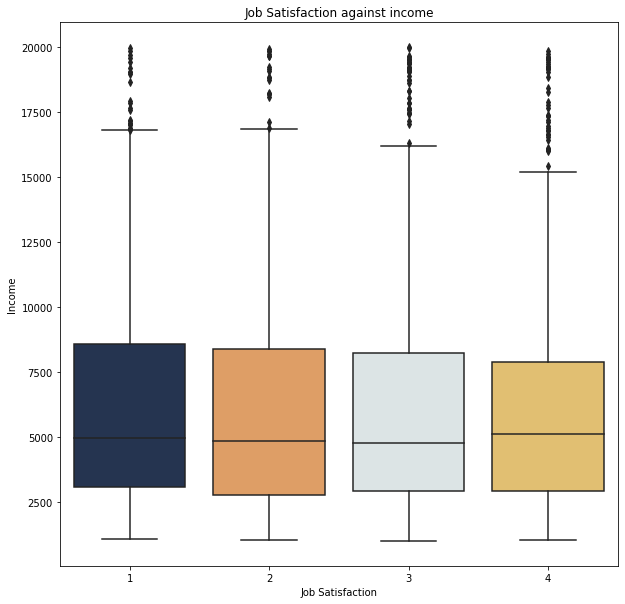

In [208]:
plt.figure(figsize=(10,10))
y = data['MonthlyIncome'].values
x = data['JobSatisfaction'].values
ax = sns.boxplot(x, y)
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Income')
ax.set( title = 'Job Satisfaction against income')
plt.show()

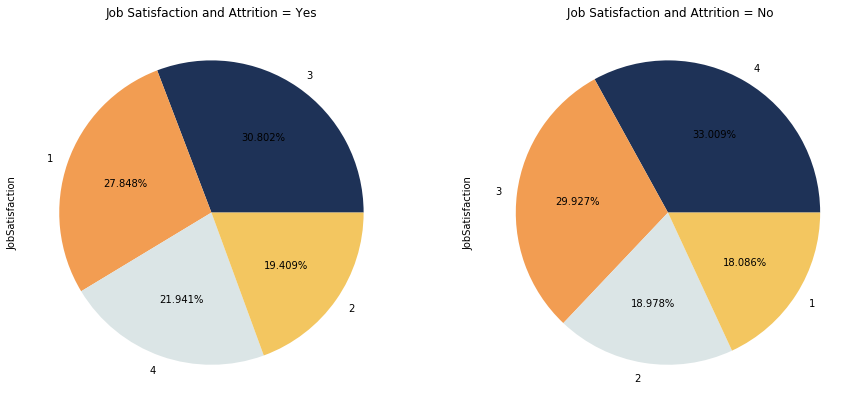

In [209]:
f,ax=plt.subplots(1,2, figsize=(15,10))
a = data[(data['Attrition'] == "Yes")]
n = data[(data['Attrition'] == "No")]
ax[0].set_title("Job Satisfaction and Attrition = Yes")
a.JobSatisfaction.value_counts().plot.pie(autopct='%1.3f%%', ax = ax[0])
n.JobSatisfaction.value_counts().plot.pie(autopct='%1.3f%%', ax = ax[1])
ax[1].set_title(" Job Satisfaction and Attrition = No")
plt.show()

[Text(0.5, 1.0, 'JobSatisfaction relative to years at company')]

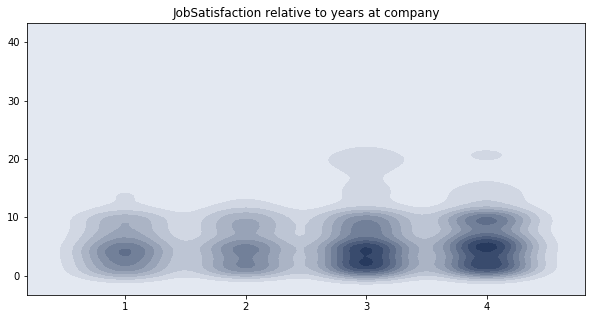

In [217]:
plt.figure(figsize=(10,5))
y = data['YearsAtCompany'].values
x = data['JobSatisfaction'].values
ax = sns.kdeplot(x, y, shade=True)
ax.set( title = 'JobSatisfaction relative to years at company')

Most of the values are allocated to grades 3 and 4, this can be seen by relative to hourly rates. People with lower rates also have more positive satisfaction ratings. You can also notice that those who left most of them take grades 1 and 3.

Feature : Job Involvement

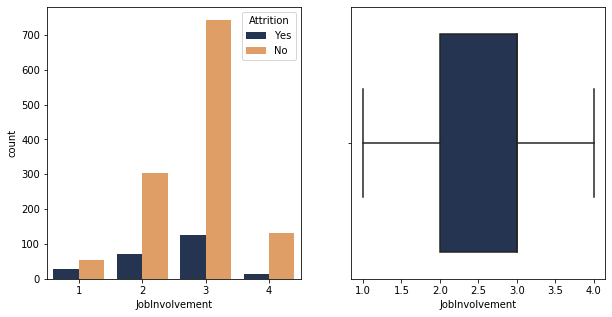

In [211]:
fig,ax=plt.subplots(1,2, figsize=(10,5))
sns.countplot(x = 'JobInvolvement',data = data, hue = 'Attrition', ax=ax[0])
sns.boxplot('JobInvolvement', data = data)
plt.show()

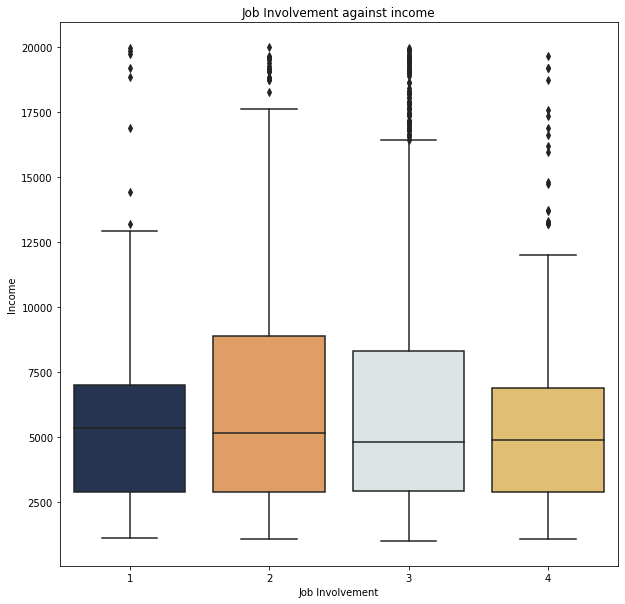

In [218]:
plt.figure(figsize=(10,10))
y = data['MonthlyIncome'].values
x = data['JobInvolvement'].values
ax = sns.boxplot(x, y)
ax.set_xlabel('Job Involvement')
ax.set_ylabel('Income')
ax.set( title = 'Job Involvement against income')
plt.show()

It is mentionable that a larger amount of data is distributed on blocks 2 and 3. Also there is a large amount of outliners. 
Based on this, Monthly income has too much data scatter.

Feature : Marital Status

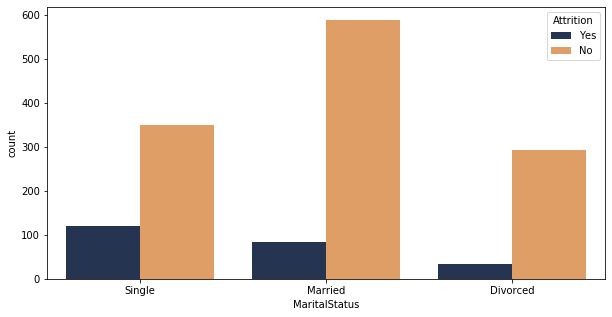

In [219]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'MaritalStatus', data = data, hue = 'Attrition')

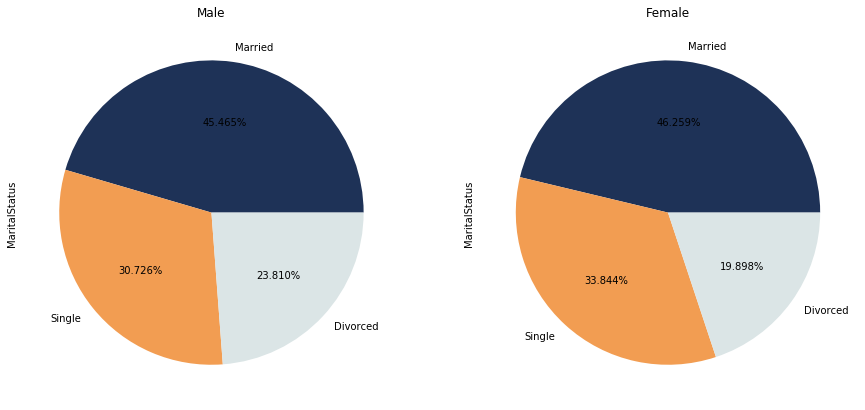

In [225]:
f,ax=plt.subplots(1,2, figsize=(15,10))
a = data[(data['Gender'] == "Male")]
n = data[(data['Gender'] == "Female")]
ax[0].set_title('Male')
a.MaritalStatus.value_counts().plot.pie(autopct='%1.3f%%', ax = ax[0])
n.MaritalStatus.value_counts().plot.pie(autopct='%1.3f%%', ax = ax[1])
ax[1].set_title("Female")
plt.show()

In [227]:
#making a copy od array with only non-object columns
df = data[nums]

0.05015165298182251 0.046728953485744996 0.04863584244345494 0.03907551704333769 0.0390857613463161 0.049505634416712914 0.03331925874142345 0.03197917264813502 0.039138975440102676 0.05626337732109841 0.04843830196467921 0.04649912192440696 0.044643271889421035 0.012020621983615696 0.0382692662571242 0.0363740021224062 0.08046555298123069 0.04091458848335128 0.03669134700256416 0.18179977952305187


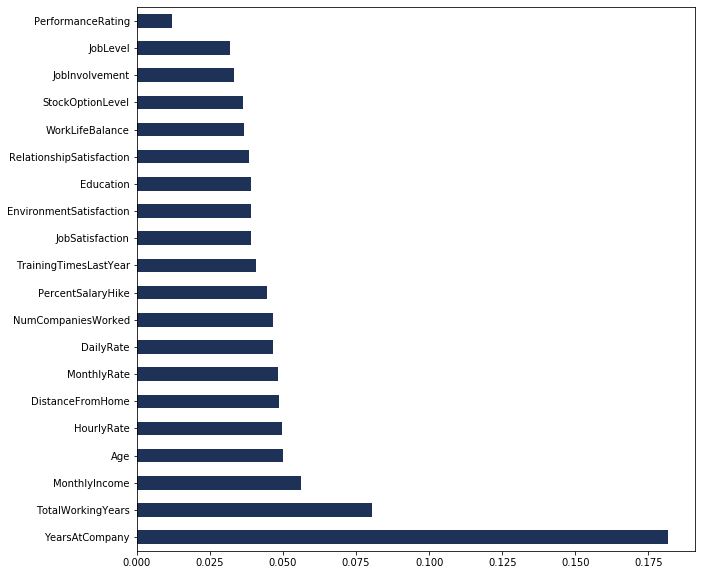

In [235]:
#applying feature importance
plt.figure(figsize=(10,10))
x = df.iloc[:,0:20]
y = df.iloc[:,-1] 
m = ExtraTreesClassifier()
m.fit(x,y)
print(*m.feature_importances_)
ax = pd.Series(m.feature_importances_, index = x.columns)
ax.nlargest(23).plot(kind = 'barh')
plt.show()